# Experiment 1 - Common use case, optimizing N threads

In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from subprocess import call

%run '/home/mark/Desktop/Plastic-Parallel-Programming/data_analysis/year 2/utilities.ipynb'

In [11]:
machine = "spa"

folder_path  = 'results/' + machine + '/'

number_of_runs  = 101

if machine == "spa":
    number_of_tests = 27
    max_num_workers = 12
    
elif machine == "XXXII":
    number_of_tests = 72
    max_num_workers = 32

In [5]:
file_names = []

for i in range(1, number_of_tests + 1): 
    file_names.append("test" + str(i) + "/output")

In [12]:
data = []
        
fetch_data(folder_path, file_names, data, ["Runtime"])
        
dataset = []

power = 10
num_workers = 4
barriers = ["No barrier", "My barrier", "Pthreads barrier"]
barrier = 0

for i in range(len(data)):
    dataset.append([2 ** power, num_workers, data[i].mean()[0], barriers[barrier]])
    
    if num_workers == max_num_workers:
        if power == 12:
            barrier = barrier + 1
            num_workers = 4
            power = 10
        else:
            num_workers = 4
            power = power + 1
    else:
        num_workers = num_workers + 4

dataset = pd.DataFrame(dataset)
dataset.columns = ["Grid Size", "Num Workers", "Time", "Barrier Implementation"]

no_b = dataset.loc[dataset["Barrier Implementation"] == "No barrier"]
my_b = dataset.loc[dataset["Barrier Implementation"] == "My barrier"]
pt_b = dataset.loc[dataset["Barrier Implementation"] == "Pthreads barrier"]

dataset

,Grid Size,Num Workers,Time,Barrier Implementation
0,1024,4,319.584158,No barrier
1,1024,8,167.623762,No barrier
2,1024,12,97.257426,No barrier
3,2048,4,1265.950495,No barrier
4,2048,8,1302.277228,No barrier
5,2048,12,1047.663366,No barrier
6,4096,4,5213.544554,No barrier
7,4096,8,3808.108911,No barrier
8,4096,12,3895.831683,No barrier
9,1024,4,322.792079,My barrier


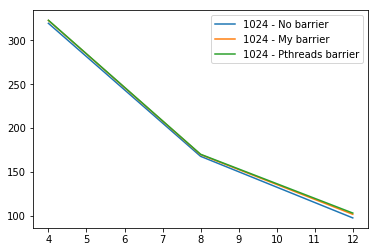

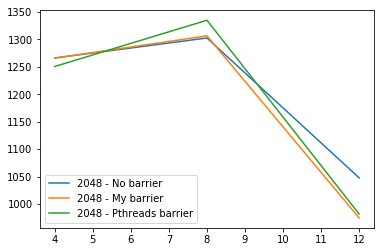

In [13]:
for i in range(0, 2):
    test = no_b.loc[no_b['Grid Size'] == 2 ** (10 + i)]
    plt.plot(test["Num Workers"], test["Time"], label=str(2 ** (10 + i)) + " - No barrier")
    
    test = my_b.loc[my_b['Grid Size'] == 2 ** (10 + i)]
    plt.plot(test["Num Workers"], test["Time"], label=str(2 ** (10 + i)) + " - My barrier")
    
    test = pt_b.loc[pt_b['Grid Size'] == 2 ** (10 + i)]
    plt.plot(test["Num Workers"], test["Time"], label=str(2 ** (10 + i)) + " - Pthreads barrier")
    
    plt.legend(loc='best')
    plt.savefig("graphs/" + machine + "/" + str(2 ** (10 + i)) + ".png")
    plt.show()